In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline


%matplotlib inline
%pylab inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
plt.style.use(['seaborn-white'])

Populating the interactive namespace from numpy and matplotlib


## User creation
***

In [3]:
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
users.isnull().sum()/len(users)*100

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64

In [6]:
users['invited_by_user_id'].fillna(0, inplace=True)
users['last_session_creation_time'].fillna(0, inplace=True)

In [7]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')

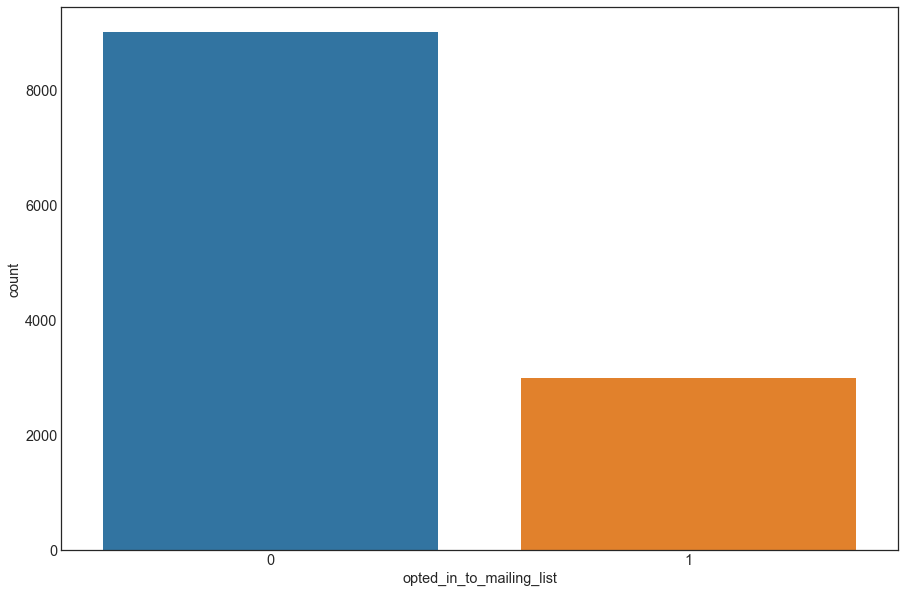

In [8]:
sns.countplot(x='opted_in_to_mailing_list',data=users)

Most users opted into not receiving marketing emails.

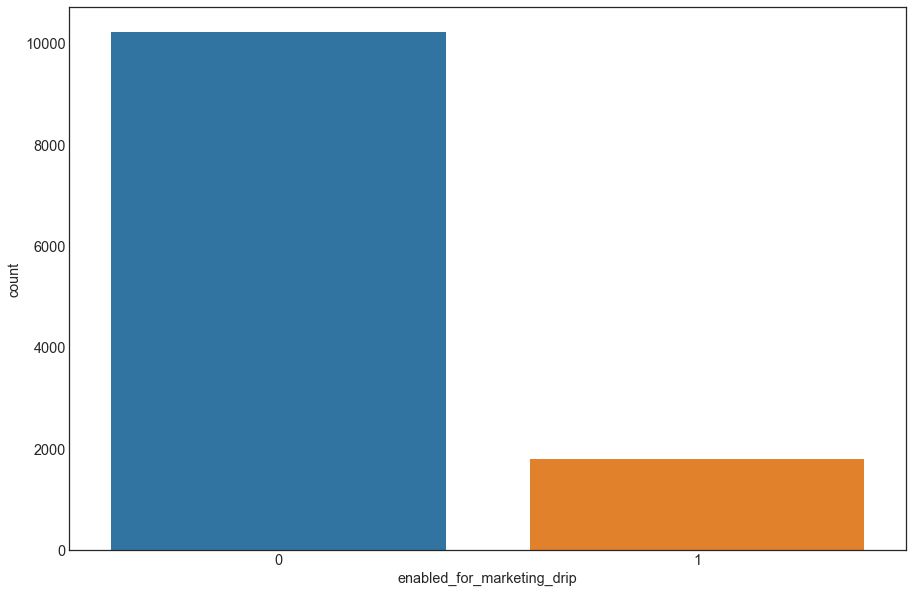

In [9]:
sns.countplot(x='enabled_for_marketing_drip',data=users)

Most users disabled the regular marketing email drip.

Text(0,0.5,'Count')

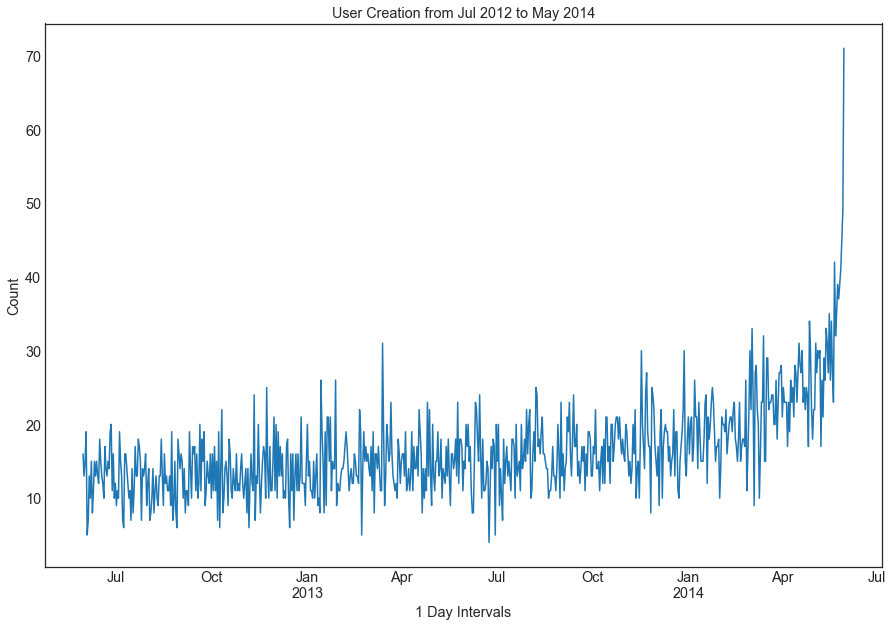

In [10]:
users.set_index('creation_time').resample('1D').count()['object_id'].plot()
plt.title('User Creation from Jul 2012 to May 2014')
plt.xlabel('1 Day Intervals')
plt.ylabel('Count')

User creation started increasing around April 2014.

In [11]:
users['org_id'].value_counts().iloc[:20]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
18     73
13     72
16     72
20     68
15     64
Name: org_id, dtype: int64

The organization most users belong to are 0,1 and 2.

In [12]:
users['invited_by_user_id'].value_counts().iloc[:10]

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
Name: invited_by_user_id, dtype: int64

Out of the 12,000 users who signed up for the product in the last two years, 5583 were not invited by a user.

In [13]:
users.groupby(by='creation_source')['object_id'].count()

creation_source
GUEST_INVITE          2163
ORG_INVITE            4254
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: object_id, dtype: int64

Most users created their account thanks to an invitation to an organization.

In [14]:
users['last_session_creation_time'].value_counts().iloc[:5]

0.000000e+00    3177
1.401868e+09       2
1.401917e+09       2
1.400783e+09       1
1.387907e+09       1
Name: last_session_creation_time, dtype: int64

3177 users never logged in after signing up.

## Engagement
***

In [15]:
engage = pd.read_csv('takehome_user_engagement.csv')
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


The data has 207,917 logins from different users.

In [17]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'], format='%Y-%m-%d %H:%M:%S')
engage['date'] = engage['time_stamp'].dt.date

Text(0,0.5,'Count')

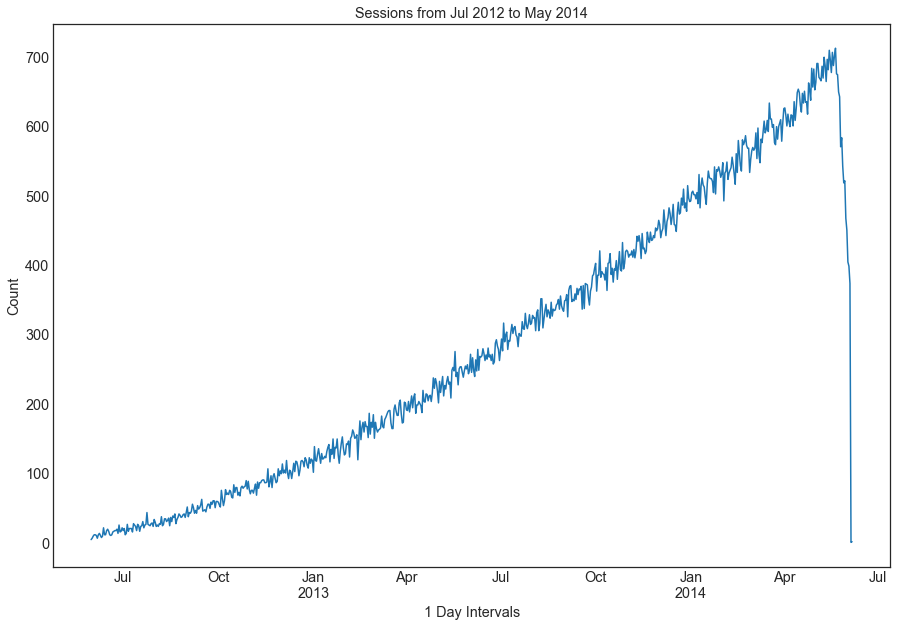

In [18]:
engage.set_index('time_stamp').resample('1D').count()['visited'].plot()
plt.title('Sessions from Jul 2012 to May 2014')
plt.xlabel('1 Day Intervals')
plt.ylabel('Count')

Daily engagement has gradually increased since July 2012.

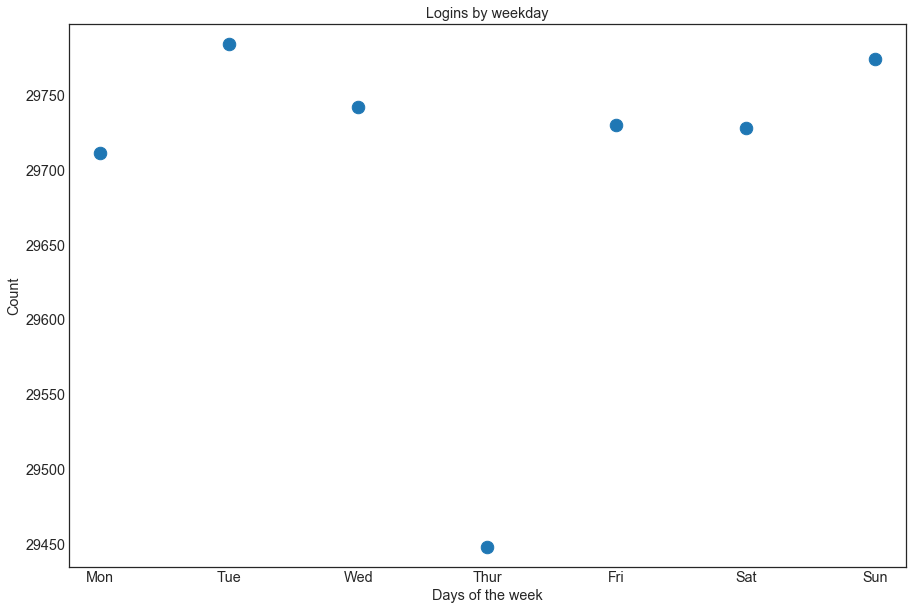

In [19]:
w = engage['time_stamp'].dt.weekday.value_counts().sort_index()
ax = w.plot(marker='.',linestyle='none',markersize=25,visible=True)
ax.set_xticklabels(['','Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.title('Logins by weekday')
plt.xlabel('Days of the week')
plt.ylabel('Count')
plt.margins(0.04)

Thursday seems to be the day with less engagement. As far as the other days of the week, they seem homogeneous.

Text(0.5,1,'Top 20 users')

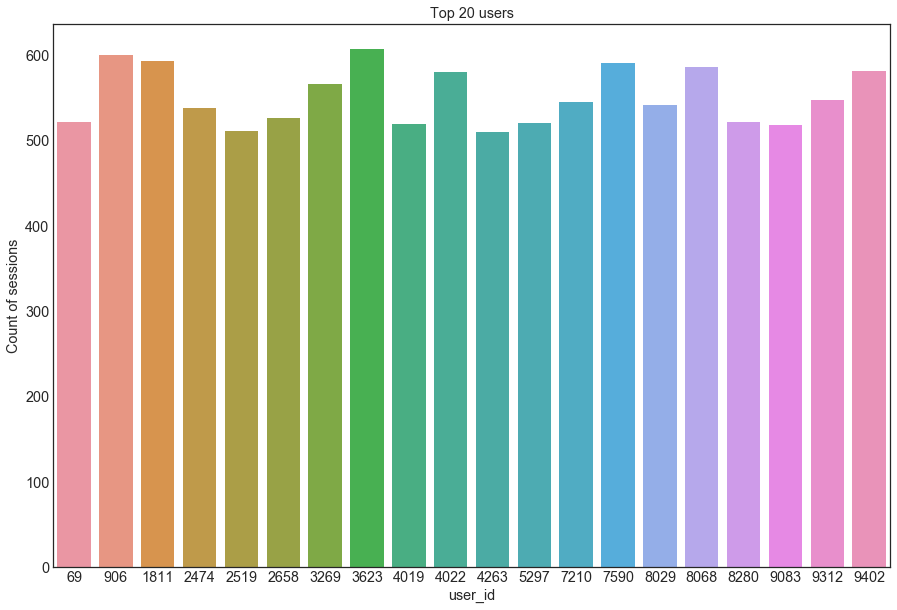

In [20]:
top_20 = engage.groupby('user_id')['visited'].count().sort_values(ascending=False)[:20].reset_index()
sns.barplot(x='user_id', y='visited', data=top_20)
plt.ylabel('Count of sessions')
plt.xlabel('user_id')
plt.title('Top 20 users')

The top 20 users have more than 500 sessions in 2 year period.

## Factors that predict future user adoption
***

In [21]:
engage.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [22]:
grouped = engage.groupby('user_id')

In [23]:
users['adopted'] = 0

In [24]:
for name, group in grouped:
    num_logins = len(group)
    if num_logins >= 3:
        dates = group['date'].drop_duplicates().reset_index(drop=True)
        for i in range(num_logins-2):
            delta = dates[i+2] - dates[i]
            if delta.days < 7:
                users.loc[users['object_id']==name, 'adopted'] = 1
                break
                
len(users[users['adopted']==1])

1602

There are 1602 of adopted users.

In [25]:
adopted = users[users['adopted']==1]
adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,0.0,1
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,0.0,1


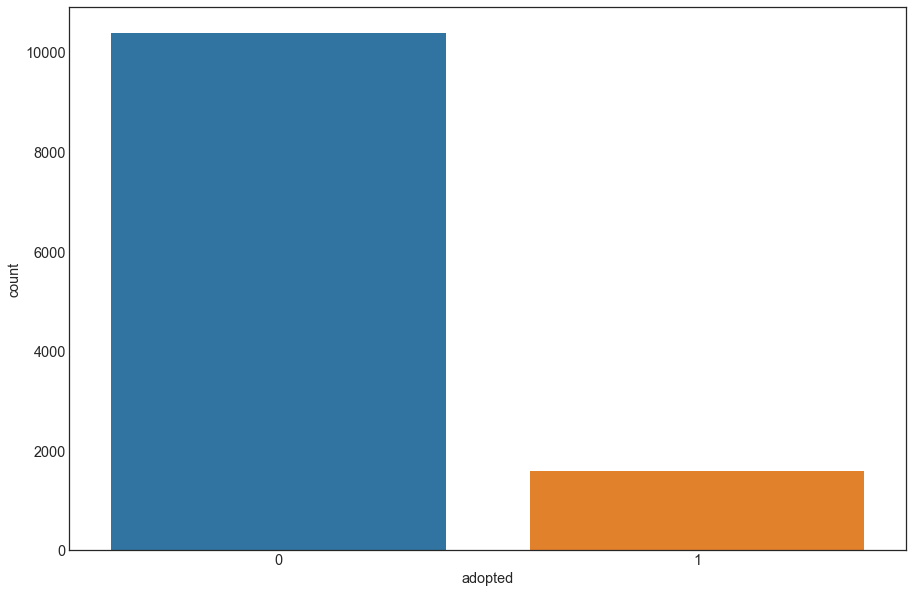

In [26]:
sns.countplot(x='adopted',data=users)

Clearly an unbalenced dataset.

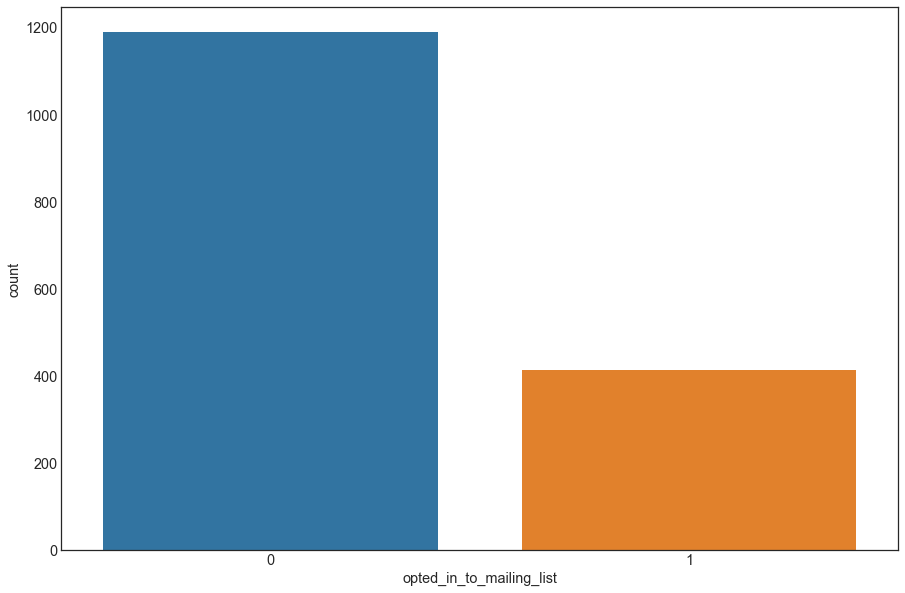

In [27]:
sns.countplot(x='opted_in_to_mailing_list',data=adopted)

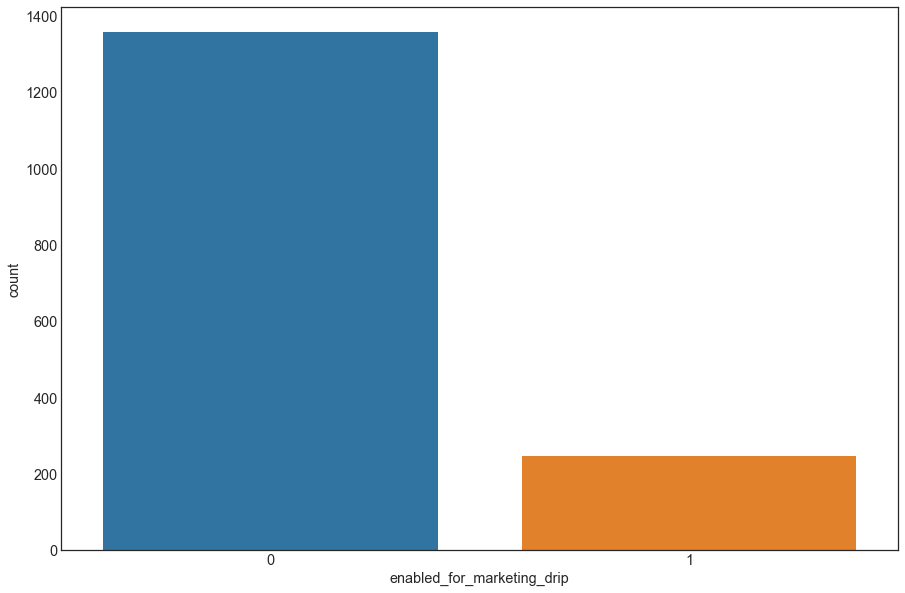

In [28]:
sns.countplot(x='enabled_for_marketing_drip',data=adopted)

In [29]:
adopted.groupby(by='creation_source')['object_id'].count()

creation_source
GUEST_INVITE          360
ORG_INVITE            553
PERSONAL_PROJECTS     164
SIGNUP                293
SIGNUP_GOOGLE_AUTH    232
Name: object_id, dtype: int64

Most adopted users come from Organization Invitations. 

In [30]:
adopted[adopted['invited_by_user_id']!=0.0]['adopted'].count()/len(adopted)*100

56.991260923845189

57% of adopted users were invited by another user. 

So according to data analysis being invited by an organization and being invited by an existing user are the best factors to predict future user adoption. Let's try modeling and check results.

## Predictive Modeling
***
The dataset is unbalanced and the classifier may try to fit the majority class providing a biased prediction. Also, it gives a false sense of accuracy. So let's use Synthetic Minority Oversampling Technique(SMOTE) to balance it. This method create new *synthetic* data points. From all the plotted data, it identifies the feature vector and nearest neighbor and it takes the difference between the two. It multiplies the difference by a random number between 0 and 1. Finally, it identifies a new point on the line segment by adding the random numbers to the feature vector and repeat all this process for all the synthetic data points.

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [32]:
X = users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip',
           'org_id','invited_by_user_id']]
y = users['adopted']

In [33]:
X = pd.get_dummies(X, columns = ['creation_source'], drop_first=False)

In [34]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,1,0,0,0,0
1,0,0,1,316.0,0,1,0,0,0
2,0,0,94,1525.0,0,1,0,0,0
3,0,0,1,5151.0,1,0,0,0,0
4,0,0,193,5240.0,1,0,0,0,0


In [35]:
sm = SMOTE(ratio='auto', kind='regular')
new_X, new_y = sm.fit_sample(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.20, random_state=102)

In [37]:
param = {'C': [0.0001,0.001,0.01,0.1,1,10,100]}

log_cv = GridSearchCV(LogisticRegression(),param,cv=5,scoring='accuracy')
%time log_cv.fit(X_train,y_train)

CPU times: user 1.18 s, sys: 27.1 ms, total: 1.21 s
Wall time: 1.24 s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
%time y_pred = log_cv.predict(X_test)

CPU times: user 1.47 ms, sys: 1.69 ms, total: 3.16 ms
Wall time: 2.03 ms


In [39]:
def results(X_test,y_test,y_pred,model):
    print("#####################")
    print("Test data")
    print("#####################")
    print("Model Accuracy: {:.2f}%".format(100*model.score(X_test, y_test)))
    print("#####################")
    print(classification_report(y_test, y_pred))
    print("#####################")
    conf_matrix = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_matrix, range(2),range(2))
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap='Blues',annot=True,annot_kws={"size": 36},fmt='g')

#####################
Test data
#####################
Model Accuracy: 54.88%
#####################
             precision    recall  f1-score   support

          0       0.56      0.50      0.52      2085
          1       0.54      0.60      0.57      2075

avg / total       0.55      0.55      0.55      4160

#####################


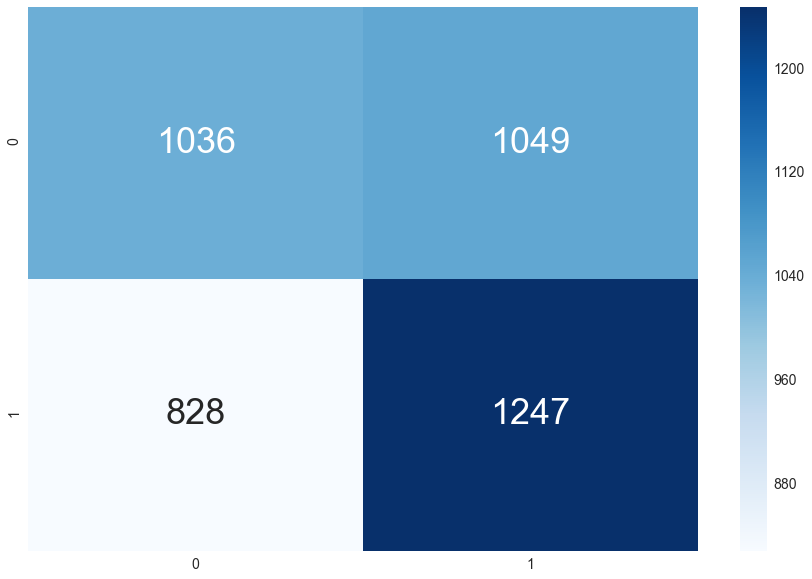

In [40]:
results(X_test,y_test,y_pred,log_cv)

In [41]:
params = {'max_features': ['auto','log2','sqrt'],
          'n_estimators': [5, 10, 15, 20]}

forest_cv = GridSearchCV(RandomForestClassifier(),params,cv=5,
                         scoring='accuracy')
%time forest_cv.fit(X_train,y_train)

CPU times: user 12 s, sys: 163 ms, total: 12.2 s
Wall time: 12.4 s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'log2', 'sqrt'], 'n_estimators': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
%time y_pred = forest_cv.predict(X_test)

CPU times: user 20.8 ms, sys: 2.88 ms, total: 23.7 ms
Wall time: 21.8 ms


#####################
Test data
#####################
Model Accuracy: 85.79%
#####################
             precision    recall  f1-score   support

          0       0.84      0.88      0.86      2085
          1       0.88      0.83      0.85      2075

avg / total       0.86      0.86      0.86      4160

#####################


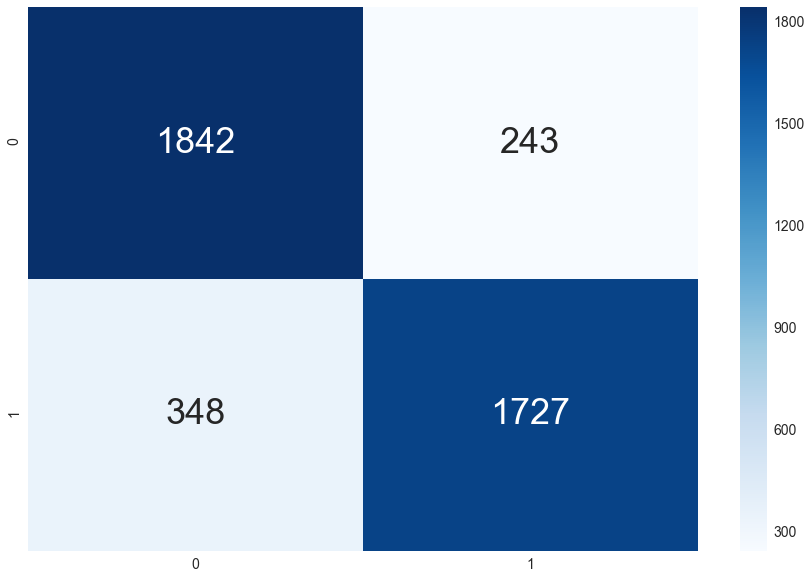

In [43]:
results(X_test,y_test,y_pred,forest_cv)

Random forest performed better than logistic regression.

In [44]:
y_pred_prob = forest_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_pred_prob)

Text(0.5,1,'ROC Curve')

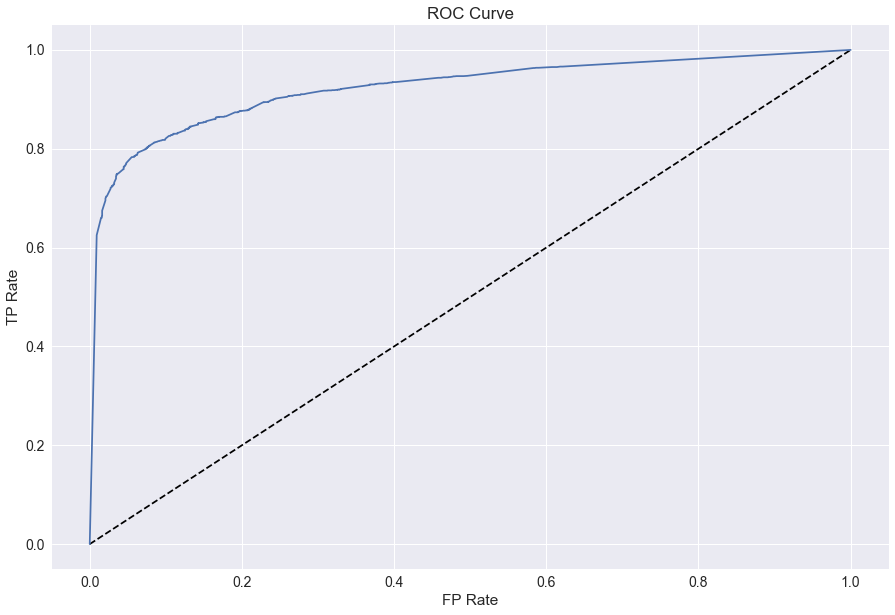

In [45]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')

In [46]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9227


In [47]:
forest_cv.best_estimator_.feature_importances_

array([ 0.14863619,  0.07671824,  0.34613473,  0.18275607,  0.03188329,
        0.07540746,  0.07297891,  0.02892585,  0.03655927])

In [48]:
features = pd.DataFrame(list(zip(X.columns, forest_cv.best_estimator_.feature_importances_)),
                 columns=['Features','Importance'])
features.sort_values(by='Importance', ascending=False)

,Features,Importance
2,org_id,0.346135
3,invited_by_user_id,0.182756
0,opted_in_to_mailing_list,0.148636
1,enabled_for_marketing_drip,0.076718
5,creation_source_ORG_INVITE,0.075407
6,creation_source_PERSONAL_PROJECTS,0.072979
8,creation_source_SIGNUP_GOOGLE_AUTH,0.036559
4,creation_source_GUEST_INVITE,0.031883
7,creation_source_SIGNUP,0.028926


Random Forest gave 86% accuracy. The results confirm the findings in data analysis. The most important factors to predict future user adoption are org_id and invited_by_user_id. As well, one can argue that opted_in_to_mailing_list can be a useful factor. 